In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.precision", 3)
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [30]:
data = pd.read_csv('train_data.csv', index_col = 'ID', usecols = ['ID', 'Gender', 'Race', 'TypeOfAdmission', 'CCSProcedureCode',
                                                                  'APRSeverityOfIllnessCode', 'PaymentTypology', 'BirthWeight',
                                                                 'EmergencyDepartmentIndicator', 'AverageCostInCounty',
                                                                  'AverageChargesInCounty', 'AverageCostInFacility',
                                                                  'AverageChargesInFacility', 'AverageIncomeInZipCode', 'LengthOfStay'])

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59966 entries, 1 to 59966
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Gender                        59966 non-null  object
 1   Race                          59966 non-null  object
 2   TypeOfAdmission               59966 non-null  object
 3   CCSProcedureCode              59966 non-null  int64 
 4   APRSeverityOfIllnessCode      59966 non-null  int64 
 5   PaymentTypology               59966 non-null  object
 6   BirthWeight                   59966 non-null  int64 
 7   EmergencyDepartmentIndicator  59966 non-null  object
 8   AverageCostInCounty           59966 non-null  int64 
 9   AverageChargesInCounty        59966 non-null  int64 
 10  AverageCostInFacility         59966 non-null  int64 
 11  AverageChargesInFacility      59966 non-null  int64 
 12  AverageIncomeInZipCode        59966 non-null  int64 
 13  LengthOfStay    

No null values

In [32]:
data.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000,59966.000,59966.000,59966.000,59966.000,59966.000,59966.000,59966.000,59966.000
mean,155.404,1.255,3336.299,2372.807,7979.127,2396.414,7958.473,59.811,2.538
std,89.542,0.546,446.244,639.755,3220.291,1248.501,3859.295,21.470,1.171
min,-1.000,1.000,2500.000,712.000,1243.000,457.000,1120.000,28.000,1.000
25%,115.000,1.000,3000.000,2041.000,4620.000,1551.000,4438.000,45.000,2.000
50%,220.000,1.000,3300.000,2533.000,9227.000,1967.000,7945.000,55.000,2.000
75%,228.000,1.000,3600.000,2785.000,10644.000,2895.000,11619.000,74.000,3.000
max,231.000,4.000,7500.000,3242.000,11381.000,8114.000,18466.000,115.000,10.000


In [33]:
data.describe(include=['object', 'category', 'boolean'])

,Gender,Race,TypeOfAdmission,PaymentTypology,EmergencyDepartmentIndicator
count,59966,59966,59966,59966,59966
unique,3,4,4,9,2
top,M,White,Newborn,Medicaid,N
freq,30978,32943,58741,28723,59453


In [36]:
print(data['Gender'].unique())
print(data['Race'].unique())
print(data['TypeOfAdmission'].unique())
print(data['PaymentTypology'].unique())
print(data['EmergencyDepartmentIndicator'].unique())
print(data.CCSProcedureCode.unique())

['F' 'M' 'U']
['Other Race' 'Black/African American' 'White' 'Multi-racial']
['Newborn' 'Emergency' 'Elective' 'Urgent']
['Medicaid' 'Private Health Insurance' 'Blue Cross/Blue Shield' 'Self-Pay'
 'Managed Care, Unspecified' 'Miscellaneous/Other'
 'Federal/State/Local/VA' 'Medicare' 'Unknown']
['N' 'Y']
[228 220   0 231 115  -1 216]


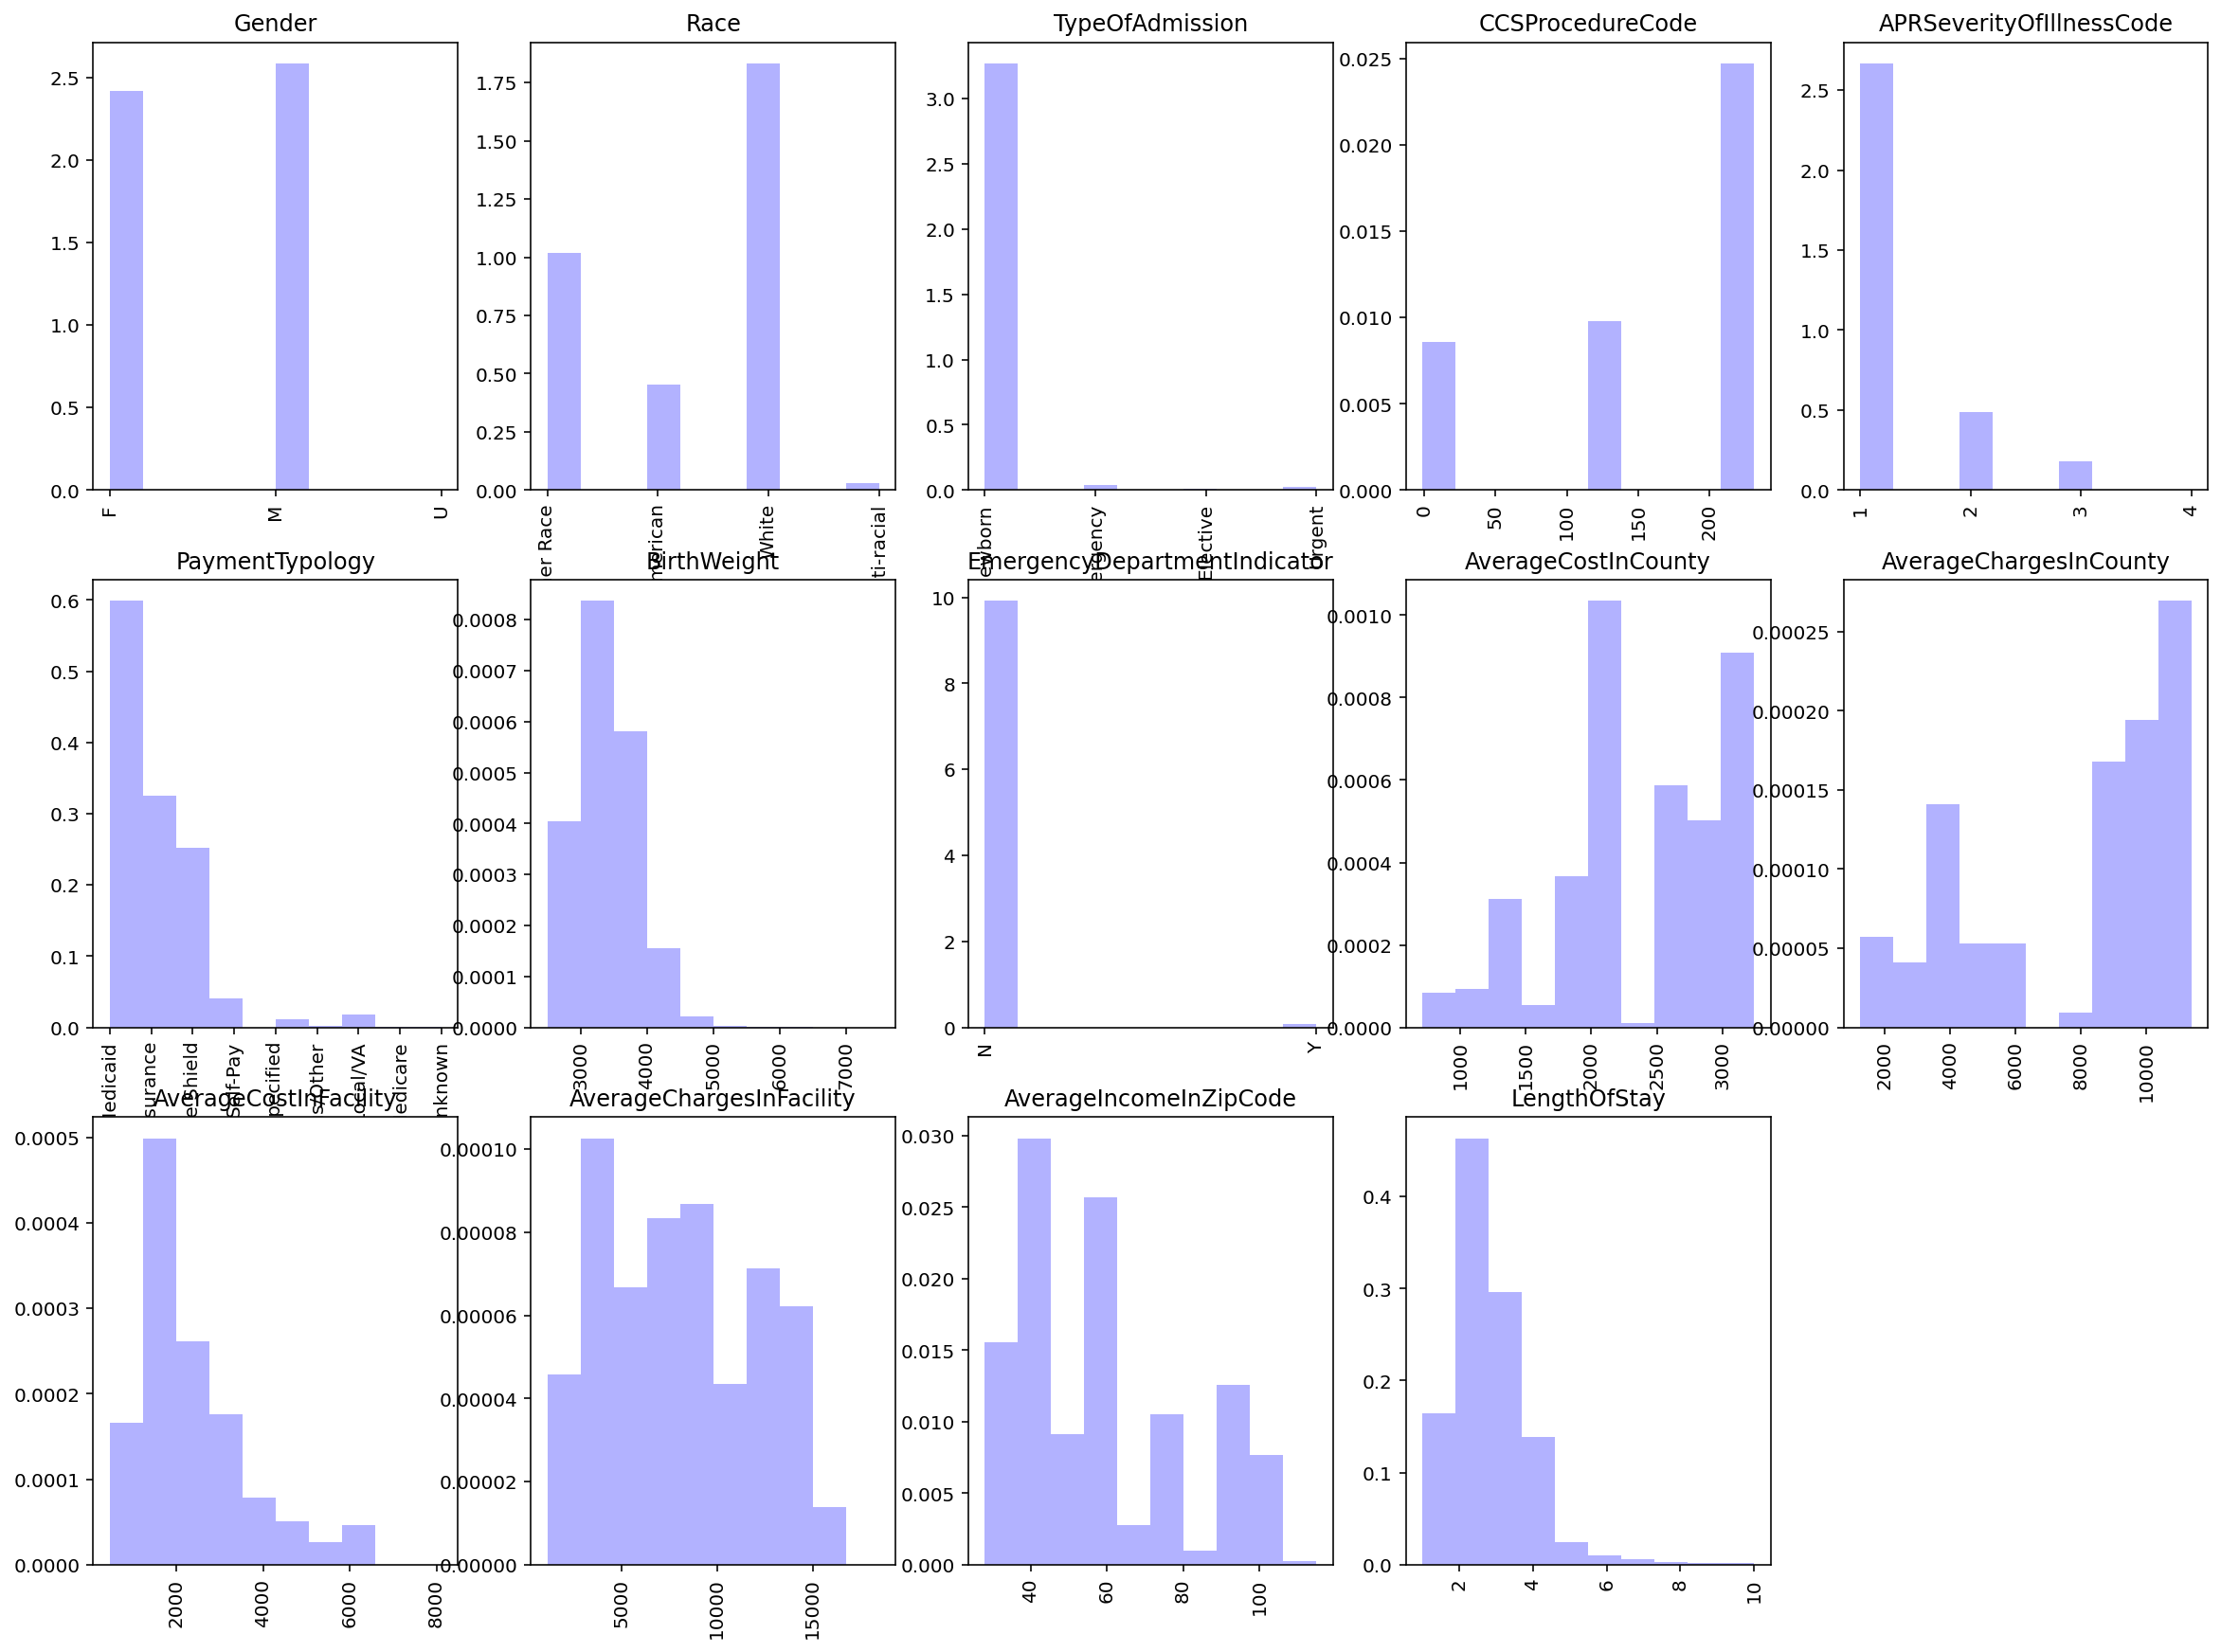

In [35]:
plt.figure(figsize=(20,20))
for i, col in enumerate(data.columns):
    plt.subplot(4,5,i+1)
    plt.hist(data[col], alpha=0.3, color='b', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

In [37]:
data.CCSProcedureCode = data.CCSProcedureCode.astype('category')
severity_dtype = pd.api.types.CategoricalDtype(
    categories=[1, 2, 3, 4], ordered=True)
data.APRSeverityOfIllnessCode = data.APRSeverityOfIllnessCode.astype(severity_dtype)
data.loc[data.EmergencyDepartmentIndicator == "Y", "EmergencyDepartmentIndicator"] = True
data.loc[data.EmergencyDepartmentIndicator == "N", "EmergencyDepartmentIndicator"] = False
data.EmergencyDepartmentIndicator = data.EmergencyDepartmentIndicator.astype('boolean')